# Approach
For a given hypocenter, back-project the first motion data into focal mechanism parameters spaces (DC, iso, CLVD).
> the source module is available [on github](https://github.com/FMassin/SeismicSource)

In [2]:
%matplotlib notebook
import sys 
sys.path.append("/Users/massin/Documents/Projects/NaiNo-Kami/Py/NnK/NnK/")
from source import SeismicSource
import matplotlib.pyplot as plt
import numpy as np


<IPython.core.display.Javascript object>


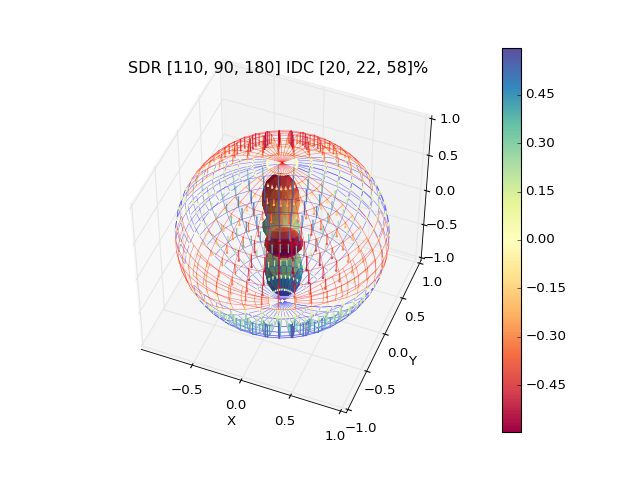

In [209]:
import source
reload(source)
clvd = np.array([-2.,1.,1.,0.,0.,0.]) * 1./np.sqrt(6.) 
iso = np.array([1.,1.,1.,0.,0.,0.]) * 1./np.sqrt(3.) 
dc = np.array([0.,0.,0.,1.,0.,0.]) * 1./np.sqrt(2.) 
mt =  dc + clvd + iso/np.sqrt(np.sum(iso**2.))*np.sqrt(np.sum(clvd**2.))/2.
example = SeismicSource(mt)

#example.Vavryeuk.plot('P','bb')
example.Aki_Richards.plot(wave='Sv', style='*')


<IPython.core.display.Javascript object>


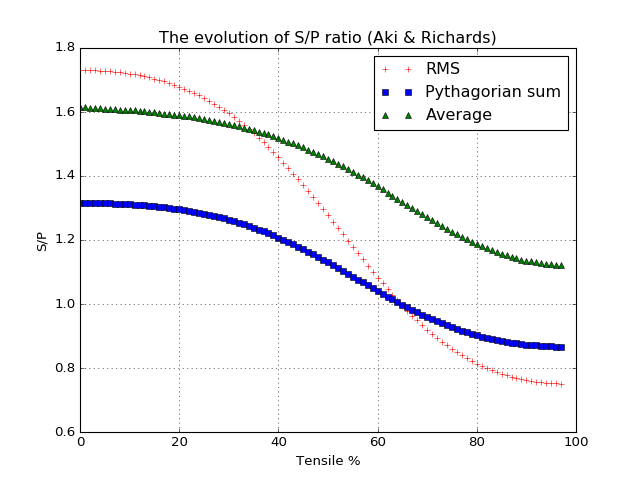

<IPython.core.display.Javascript object>


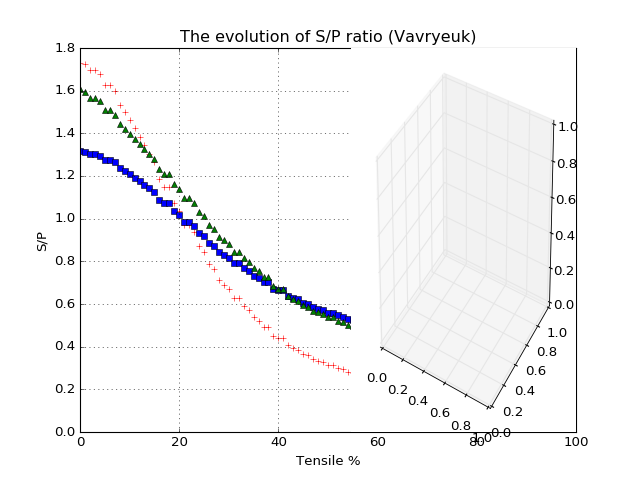

In [74]:


rms=[]
norm=[]
average=[]

rms_v=[]
norm_v=[]
average_v=[]


for x in range(1, 99):
    c = x / 100.
    
    #clvd = np.sqrt(((c-c/3)**2)/4) 
    #iso = np.sqrt(((c-c*2/3)**2)/3) 
    #example = SeismicSource([-clvd+iso,2*clvd+iso,-clvd*iso,-1-c,0.,0.])
    #example = SeismicSource([0,2*c,0,1-c,0.,0.])
    example = SeismicSource([0,c,0,1-c,0.,0.])
    
    S = example.Aki_Richards.energy('S')
    P = example.Aki_Richards.energy('P')
    
    S_v = example.Vavryeuk.energy('S')
    P_v = example.Vavryeuk.energy('P')
    
    rms.append(S[0]/P[0])
    norm.append(S[1]/P[1])
    average.append(S[2]/P[2])  
    
    rms_v.append(S_v[0]/P_v[0])
    norm_v.append(S_v[1]/P_v[1])
    average_v.append(S_v[2]/P_v[2]) 
    
#    if x in ( 10, 50, 90 ) :
#        example.Aki_Richards.plot('P')
#        example.Vavryeuk.plot('P')
#        example.Aki_Richards.plot('S')
#        example.Vavryeuk.plot('S')

fig = plt.figure()
plot = fig.gca()  
    
plt.plot(np.arange(98),rms, 'r+', np.arange(98),norm, 'bs', np.arange(98),average, 'g^')
plt.xlabel('Tensile %')
plt.ylabel('S/P')
plt.title('The evolution of S/P ratio (Aki & Richards)')
plt.grid(True)
plt.legend( ["RMS", "Pythagorian sum", "Average" ] )
plt.show()

fig = plt.figure()
plot = fig.gca()  

plt.plot(np.arange(98),rms_v, 'r+', np.arange(98),norm_v, 'bs', np.arange(98),average_v, 'g^')
plt.xlabel('Tensile %')
plt.ylabel('S/P')
plt.title('The evolution of S/P ratio (Vavryeuk)')
plt.grid(True)
plt.legend( ["RMS", "Pythagorian sum", "Average" ] )
plt.show()